In this project, we will see how we can add a watermarking to an image.Adding a watermark work as a copyright for your image. so that no one can illegally use your image or document.We will use openCV for this project to add logo and text as a watermark


In [1]:
## Important library imports
import cv2
import numpy as np
import requests
from PIL import Image

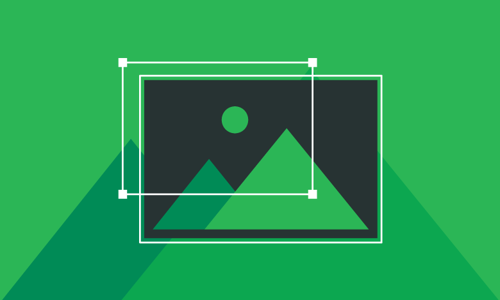

In [2]:
# Reading Image from url
image = Image.open(requests.get('https://media.sproutsocial.com/uploads/2017/02/10x-featured-social-media-image-size.png', stream=True).raw)
image_logow = image.resize((500,300))
image_textw = image.resize((500,300))
image_logow

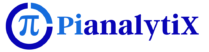

In [3]:
logo = Image.open(requests.get('https://pianalytix.com/wp-content/uploads/2020/05/cropped-pianalytiX-full-logo-square-2-209x52.png', stream = True).raw)
logo

In [4]:
image_logow = np.array(image_logow.convert("RGB"))
h_image, w_image, _ = image_logow.shape
logo = np.array(logo.convert("RGB"))
h_logo, w_logo, _ = logo.shape

In [5]:
# Get the center of the original. It's the location where we will place the watermark
center_y = int(h_image / 2)
center_x = int(w_image / 2)
top_y = center_y - int(h_logo / 2)
left_x = center_x - int(w_logo / 2)
bottom_y = top_y + h_logo
right_x = left_x - w_logo

In [16]:
# Get ROI
roi = image_logow[top_y: bottom_y, left_x: right_x]
# Add the Logo to the Roi
result = cv2.addWeighted(roi, 1.0,roi, 1.0,0,logo)
# Drawing
cv2.line(image_logow, (0, center_y), (left_x, center_y), (0, 0, 255), 1)
cv2.line(image_logow, (right_x, center_y), (w_image, center_y), (0, 0, 255), 1)
# Replace the ROI on the image
image_logow[top_y: bottom_y, left_x: right_x] = result

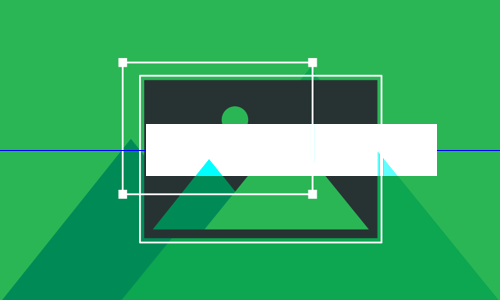

In [17]:
#plotting the watermark image
img = Image.fromarray(image_logow, "RGB")
img

In [18]:
#Text Watermark
image_text = np.array(image_textw.convert("RGB"))
cv2.putText(image_text, text = "Pianalytix", org = (w_image - 95, h_image - 10), fontFace = cv2.FONT_HERSHEY_COMPLEX, fontScale = 0.5,
            color = (0,0,255), thickness=2, lineType = cv2.LINE_4);

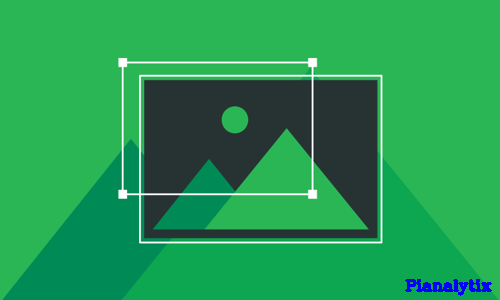

In [19]:
# ploting text watermark image
timg = Image.fromarray(image_text,"RGB")
timg

## Conclusion:

Adding a watermark to an image works as a copyright. Different organizations can use it to make their content secure so that their content cannot be misused without thier license or a paid version. In this project we saw how easily we can use OpenCV to add watermarks to our images.